
<br><h1><center>Agentie de turism</center></h1>


<div style="text-align: right">
        $\color{Green}{\text{Aldea Alexandru George}}$                                                                                  <br>$\color{Green}{\text{ Nedelcu Arabela}}$ 
</div>                                                                                                        

O agenție de turism care vrea să se extindă într-o altă piață are în actuala piață 7 tipuri de pachete de vacanță. Agenția dorește să analizeze datele actualilor clienți, care deja au achiziționat unul dintre pachete, pentru a identifica ce pachet merită sau nu să fie introduse în noua piață.

Pentru analiză sunt disponibile urmatoarele informații despre actialii clienți: genul, starea socială, vârsta, dacă are studii superioare sau nu, profesia, vechimea în muncă, cât este de cheltuitor, numarul de membri ai familiei. De asemenea, actualii clienți sunt categorisiți în 4 tipuri în funcție de numărul de pachete de vacanță achizitionate până acum de la agenție.

Se dorește o analiză a detaliilor sociale ale actualilor clienți cu scopul de a prezice fidelitatea acestora (încadrarea în una dintre cele 4 categorii), metoda ce ar putea fi folosită și în noua piață.

Mai mult, noii potențiali clienți au fost rugați să raspundă la un chestionar, în care au fost întrebați ce pachet de vacanță ar alege din lista actuală, pentru ca agenția să își poată da seama dacă comportamentul actualilor clienți este asemanator cu cel al potențialilor noi clienți.

## Procesarea datelor, curățarea, transformarea acestora utilizand Dataframes și Spark SQL

In [1]:
import pandas as pd

Importam fisierul ce contine datele despre actualii clienti si analizam structura tabelului. Importam si fisierul ce contine datele de test

In [2]:
data = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
data

,ID,Gender,Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Package
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A,4.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B,6.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B,6.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A,6.0
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,D,1.0
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,D,4.0
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D,6.0
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B,6.0


Afisam schema si analizam statisticile descriptive ale setului de date

In [3]:
data.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Married          7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Category         8068 non-null   object 
 10  Package          7992 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 693.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-n

In [4]:
data.describe(include='all')

,ID,Gender,Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Package
count,8068.000000,8068,7928,8068.000000,7990,7944,7239.000000,8068,7733.000000,8068,7992.000000
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,4,NaN
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,D,NaN
freq,NaN,4417,4643,NaN,4968,2516,NaN,4878,NaN,2268,NaN
mean,463479.214551,NaN,NaN,43.466906,NaN,NaN,2.641663,NaN,2.850123,NaN,5.139264
std,2595.381232,NaN,NaN,16.711696,NaN,NaN,3.406763,NaN,1.531413,NaN,1.423738
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,1.000000
25%,461240.750000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,4.000000
50%,463472.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,6.000000
75%,465744.250000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,6.000000


In [5]:
test.describe(include='all')

,ID,Gender,Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Package
count,2627.000000,2627,2577,2627.000000,2603,2589,2358.000000,2627,2514.000000,2595.000000
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,NaN
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,NaN
freq,NaN,1424,1520,NaN,1602,802,NaN,1616,NaN,NaN
mean,463433.918919,NaN,NaN,43.649791,NaN,NaN,2.552587,NaN,2.825378,5.125241
std,2618.245698,NaN,NaN,16.967015,NaN,NaN,3.341094,NaN,1.551906,1.410706
min,458989.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,1.000000
25%,461162.500000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,4.000000
50%,463379.000000,NaN,NaN,41.000000,NaN,NaN,1.000000,NaN,2.000000,6.000000
75%,465696.000000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,6.000000


Verificam daca exista duplicate in fisier

In [6]:
print('Numarul de linii duplicate din fisierul de antrenament este: ', data.duplicated().sum())
print('Numarul de linii duplicate din fisierul de test este: ', test.duplicated().sum())

Numarul de linii duplicate din fisierul de antrenament este:  0
Numarul de linii duplicate din fisierul de test este:  0


Observam ca avem o coloana ID, care nu ne va fi folosotoare. <br>
De asemenea, setul de date contine valori null. <br><br>
Acestea probleme vor fi rezolvate pentru o mai buna analiza a datelor dupa cum urmeaza:<br>
    -se va sterge coloana ID<br>
    -vom elimina randurile care au null pe coloana "Package" - sunt clienti care nu au achizitionat un pachet de calatorie sau noi clienti care nu si-au exprimat vreo opinie in legatura cu pachetele noastre de calatorie;<br><br>
Pentru datele de antrenament vom inlocui valorile null cu cea mai frecventa inregistrare de pe coloana respectiva<br><br>
Pentru datele de test:<br>
    -vom presupune ca persoanele care au null pe coloana "Married" sunt necasatorite;<br>
    -vom presupune ca persoanele care au null pe coloana "Graduated" nu au studii superioare;<br>
    -vom presupune ca persoanele care au null pe coloana "Profession" sunt muncitori necalificati;<br>
    -vom presupune ca persoanele care au null pe coloana "Work_Experience" au 0 ani vechime;<br>
    -vom presupune ca persoanele care au null pe coloana "Family_Size" provin dintr-o familie in care ei sunt singurul membru.<br>
    


In [7]:
data=data.drop(['ID'], axis=1)
test=test.drop(['ID'], axis=1)

In [8]:
data.dropna(subset = ["Package"], inplace=True)
test.dropna(subset = ["Package"], inplace=True)

In [9]:
data = data.fillna(data.mode().iloc[0])

In [10]:
test.loc[(test['Married'].isnull()),'Married']= 'No'
test.loc[(test['Graduated'].isnull()),'Graduated']= 'No'
test.loc[(test['Profession'].isnull()),'Profession']= 'Unqualified Worker'
test.loc[(test['Work_Experience'].isnull()),'Work_Experience']= 0
test.loc[(test['Family_Size'].isnull()),'Family_Size']= 1

Evaluam modificarile

In [11]:
data.isnull().sum()

Gender             0
Married            0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Category           0
Package            0
dtype: int64

In [12]:
test.isnull().sum()

Gender             0
Married            0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Package            0
dtype: int64

## Analizam datele din fisierul de antrenament

In [13]:
# determinam varsta minima si maxima a cumparatorilor
data.agg({'Age':'min'})

Age    18
dtype: int64

In [14]:
data.agg({'Age':'max'})

Age    89
dtype: int64

In [15]:
# numaram de cate ori a fost achizitionat fiecare pachet de vacanta
data.Package.value_counts()

6.0    5238
4.0    1089
3.0     822
2.0     422
7.0     203
1.0     133
5.0      85
Name: Package, dtype: int64

In [16]:
# care este media numarului de persoane dintr-o familie, grupat pe categoriile agentiei si ordonat creascator
from pyspark import SparkContext as sc
from pyspark.sql import SparkSession


# Convertim DataFrame-ul Pandas la PySpark (Spark)
spark1 = SparkSession.builder.appName('SQL').getOrCreate()
sparkDF = spark1.createDataFrame(data) 

sparkDF.createOrReplaceTempView('clienti')

result = spark1.sql("select Category, avg(Family_Size) as medie from clienti group by Category order by medie")
result.show()

+--------+------------------+
|Category|             medie|
+--------+------------------+
|       A|2.4178187403993854|
|       B| 2.680758807588076|
|       C|  2.95638789122627|
|       D|3.1532293986636972|
+--------+------------------+



Vizualizari grafice

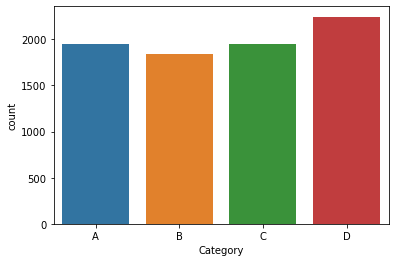

In [17]:
# distibutia clientilor per categorie

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.countplot(data['Category'], order=['A','B','C','D']);

Se poate observa ca distributia clientilor este relativ egala in cele 4 categorii de fidelitate

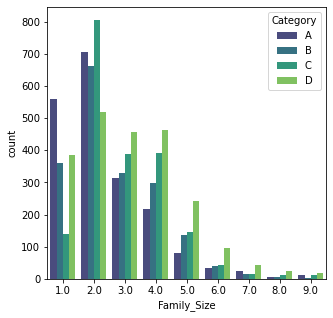

In [18]:
# distributia numarului de membri ai familiei per categorie

plt.figure(figsize=(5,5))
sns.countplot('Family_Size', hue='Category', data=data, hue_order=['A','B','C','D'], palette='viridis');

Text(0, 0.5, 'Count')

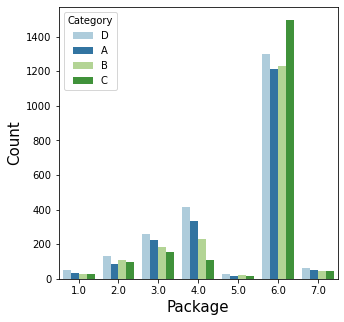

In [19]:
# vizualizarea vanzarilor fiecarui pachet per categorie

plt.figure(figsize=(5,5))
ax=sns.countplot('Package',hue='Category',data=data, palette='Paired')

ax.set_xlabel('Package', fontsize = 15)
ax.set_ylabel( 'Count', fontsize = 15)


Se poate observa ca cel mai cumparat pachet a fost pachetul 6, indiferent de categoria de client

In continuare vom analiza distributia pe varste a celor 4 categorii

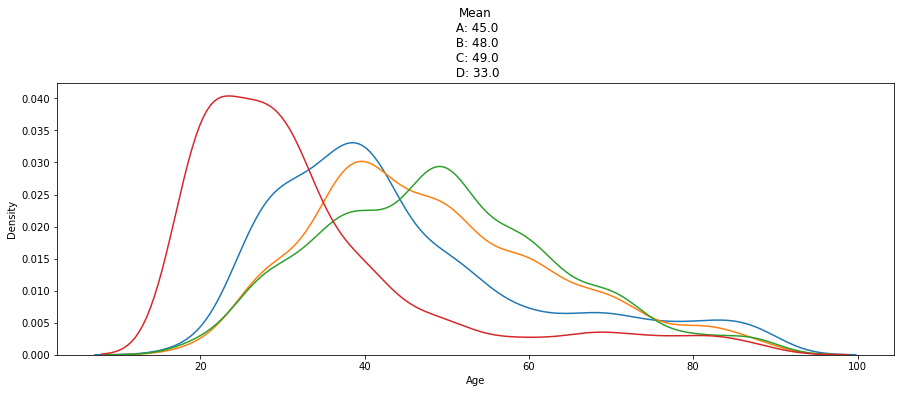

In [20]:
a = data[data.Category =='A']["Age"]
b = data[data.Category =='B']["Age"]
c = data[data.Category =='C']["Age"]
d = data[data.Category =='D']["Age"]

plt.figure(figsize=(15,5))

sns.kdeplot(a,shade= False, label = 'A')
sns.kdeplot(b,shade= False, label = 'B')
sns.kdeplot(c,shade= False, label = 'C')
sns.kdeplot(d,shade= False, label = 'D')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

Ca urmare a analizei, vom imparti clientii in 4 categorii de varsta dupa cum urmeaza:<br>
17-30 ani - categoria 1<br>
31-45 ani - categoria 2<br>
46-60 ani - categoria 3<br>
60+ - categoria 4

In [21]:
data['Age_Bin'] = pd.cut(data.Age,bins=[17,30,45,60,90],labels=['17-30','31-45','46-60','60+'])

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7992 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           7992 non-null   object  
 1   Married          7992 non-null   object  
 2   Age              7992 non-null   int64   
 3   Graduated        7992 non-null   object  
 4   Profession       7992 non-null   object  
 5   Work_Experience  7992 non-null   float64 
 6   Spending_Score   7992 non-null   object  
 7   Family_Size      7992 non-null   float64 
 8   Category         7992 non-null   object  
 9   Package          7992 non-null   float64 
 10  Age_Bin          7992 non-null   category
dtypes: category(1), float64(3), int64(1), object(6)
memory usage: 1014.8+ KB


In [22]:
test['Age_Bin'] = pd.cut(test.Age,bins=[17,30,45,60,90],labels=['17-30','31-45','46-60','60+'])

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2595 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           2595 non-null   object  
 1   Married          2595 non-null   object  
 2   Age              2595 non-null   int64   
 3   Graduated        2595 non-null   object  
 4   Profession       2595 non-null   object  
 5   Work_Experience  2595 non-null   float64 
 6   Spending_Score   2595 non-null   object  
 7   Family_Size      2595 non-null   float64 
 8   Package          2595 non-null   float64 
 9   Age_Bin          2595 non-null   category
dtypes: category(1), float64(3), int64(1), object(5)
memory usage: 205.5+ KB


Procesam datele de antrenament

In [23]:
# Convertim variabilele de clasificare la tipul numeric

data['Gender'] = data['Gender'].replace(('Male','Female'),(1,0))
data['Married'] = data['Married'].replace(('Yes','No'),(1,0))
data['Graduated'] = data['Graduated'].replace(('Yes','No'),(1,0))
data['Spending_Score'] = data['Spending_Score'].replace(('High','Average','Low'),(3,2,1))
data['Age_Bin'] = data['Age_Bin'].replace(('17-30','31-45','46-60','60+'),(1,2,3,4))
data['Category'] = data['Category'].replace(('A','B','C','D'),(1,2,3,4))

# Convertim tipul de date al "Package", "Work_Experience", "Family_Size" la int

data[['Package']] = data[['Package']].astype('int')
data[['Work_Experience']] = data[['Work_Experience']].astype('int')
data[['Family_Size']] = data[['Family_Size']].astype('int')


In [24]:
#Transformam "Profession" intr-o variabila categoiriala folosind StringIndexer

data.Profession.value_counts()

Artist           2612
Healthcare       1317
Entertainment     943
Engineer          694
Doctor            683
Lawyer            617
Executive         594
Marketing         290
Homemaker         242
Name: Profession, dtype: int64

In [25]:
sparkDF2 = spark1.createDataFrame(data) 
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="Profession", outputCol="Profession_cat")
indexed = indexer.fit(sparkDF2).transform(sparkDF2)
indexed.columns

['Gender',
 'Married',
 'Age',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'Category',
 'Package',
 'Age_Bin',
 'Profession_cat']

In [26]:
# Eliminam informatiile nefolositoare in analizele viitoare

train=indexed.drop('Profession', 'Age' )
train.columns

['Gender',
 'Married',
 'Graduated',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'Category',
 'Package',
 'Age_Bin',
 'Profession_cat']

Facem toate aceste prelucrari si pentru setul de date de test

In [27]:
test['Gender'] = test['Gender'].replace(('Male','Female'),(1,0))
test['Married'] = test['Married'].replace(('Yes','No'),(1,0))
test['Graduated'] = test['Graduated'].replace(('Yes','No'),(1,0))
test['Spending_Score'] = test['Spending_Score'].replace(('High','Average','Low'),(3,2,1))
test['Age_Bin'] = test['Age_Bin'].replace(('17-30','31-45','46-60','60+'),(1,2,3,4))
test[['Package']] = test[['Package']].astype('int')
test[['Work_Experience']] = test[['Work_Experience']].astype('int')
test[['Family_Size']] = test[['Family_Size']].astype('int')


In [28]:
#Transformam "Profession" intr-o variabila categoiriala folosind StringIndexer

sparkDF3 = spark1.createDataFrame(test) 
from pyspark.ml.feature import StringIndexer
test_indexer = StringIndexer(inputCol="Profession", outputCol="Profession_cat")
test_indexed = indexer.fit(sparkDF3).transform(sparkDF3)

# Eliminam coloanele ce nu ne vor fi folositoare in analiza
test=test_indexed.drop('Profession', 'Age' )
test.columns


['Gender',
 'Married',
 'Graduated',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'Package',
 'Age_Bin',
 'Profession_cat']

In [29]:
from pyspark.sql.types import IntegerType
train = train.withColumn("Profession_cat", train["Profession_cat"].cast(IntegerType()))
test = test.withColumn("Profession_cat", test["Profession_cat"].cast(IntegerType()))

Convertim din dataframe de PySpark in dataframe de Pandas. Salvam datele in format CSV pentru a le pastra pentru prelucrarile ulterioare

In [30]:
traincsv = train.toPandas()
testcsv = test.toPandas()

In [31]:
traincsv.to_csv("Training.csv", 
             columns=['Gender', 'Married', 'Graduated', 'Work_Experience', 'Spending_Score','Family_Size', 'Age_Bin', 'Profession_cat','Package'], 
             index = False)

In [32]:
testcsv.to_csv("Testing.csv", 
            columns=['Gender', 'Married', 'Graduated', 'Work_Experience', 'Spending_Score','Family_Size', 'Age_Bin', 'Profession_cat','Package'], 
            index = False)

## Utilizam Spark ML/ Tensorflow: o metodă clasică ML și una Deep Learning.

### Analizam daca metoda de clasificare actuala a clientilor are legatura cu detaliilor lor sociale si daca se poate folosi si la clasificarea clientilor din noua piata  

<h3><center>--------------------Regresia logistica--------------------------</center></h3>

In [33]:
#eliminam coloana ce nu ne este momentan folositoare in analiza
train=train.drop("Package")

In [34]:
# Divizarea test-train a datelor 30%, 70%
train_X,test_X = train.randomSplit([0.7,0.3])

In [35]:
# Formatarea pentru MLlib
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=['Gender', 'Married', 'Graduated', 'Work_Experience',
 'Spending_Score', 'Family_Size', 'Age_Bin', 'Profession_cat'],outputCol='features')

In [36]:
from pyspark.ml.classification import LogisticRegression

In [37]:
lr = LogisticRegression(featuresCol='features', labelCol='Category')

Antrenam modelul

In [38]:
#Cream pipeline-ul

from pyspark.ml import Pipeline

myStages = [assembler,lr]
pipeline = Pipeline(stages= myStages)

In [39]:
fitted_model = pipeline.fit(train_X)

In [40]:
trainingPred = fitted_model.transform(train_X)

In [41]:
training_sum = trainingPred.select('Category','probability','prediction').show()

+--------+--------------------+----------+
|Category|         probability|prediction|
+--------+--------------------+----------+
|       1|[1.13413592583484...|       4.0|
|       1|[9.62731707705940...|       4.0|
|       2|[7.01871758543168...|       4.0|
|       4|[1.22986310204207...|       4.0|
|       4|[1.62391569796067...|       4.0|
|       4|[1.62391569796067...|       4.0|
|       4|[9.55508178072519...|       4.0|
|       4|[6.57540522500650...|       4.0|
|       4|[1.04429578902065...|       4.0|
|       2|[2.90867562230743...|       4.0|
|       4|[1.25582967287741...|       4.0|
|       4|[1.25582967287741...|       4.0|
|       4|[9.64809017237357...|       4.0|
|       4|[5.66545736220406...|       4.0|
|       4|[4.56844221382445...|       4.0|
|       2|[5.19666743380634...|       4.0|
|       3|[6.41712343041609...|       4.0|
|       4|[7.36699295472144...|       4.0|
|       4|[5.19666743380634...|       4.0|
|       4|[6.58251615578604...|       4.0|
+--------+-

Evaluarea rezultatelor

In [42]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [43]:
evaluator = MulticlassClassificationEvaluator (labelCol='Category', predictionCol='prediction', metricName = "accuracy")

In [44]:
accuracy = evaluator.evaluate(trainingPred)

In [45]:
print(accuracy)

0.4718335127377108


Am obtinut un scor de acuratete destul de mic.

### Crearea unui proces de streaming

<h3><center>--------------------SparkStreaming--------------------------</center></h3>

Vom imparti datele de test in 3 csv-uri

In [46]:
testData = test_X.repartition(3)

In [47]:
testData.write.format("CSV").option("header",True).save("./Streaming")

Cream sursa de streaming

In [48]:
from pyspark.sql.types import StructType

In [49]:
sparkSession = SparkSession.builder.appName('SparkStream').getOrCreate()

Definim schema CSV-urilor ce urmeaza sa fie preluate prin SparkStreaming

In [50]:
dataSchema = StructType()

In [51]:
dataSchema.add("Gender", "integer")
dataSchema.add("Married", "integer")
dataSchema.add("Graduated", "integer")
dataSchema.add("Work_Experience", "integer")
dataSchema.add("Spending_Score", "integer")
dataSchema.add("Family_Size", "integer")
dataSchema.add("Category", "integer")
dataSchema.add("Age_Bin", "integer")
dataSchema.add("Profession_cat", "integer")

StructType(List(StructField(Gender,IntegerType,true),StructField(Married,IntegerType,true),StructField(Graduated,IntegerType,true),StructField(Work_Experience,IntegerType,true),StructField(Spending_Score,IntegerType,true),StructField(Family_Size,IntegerType,true),StructField(Category,IntegerType,true),StructField(Age_Bin,IntegerType,true),StructField(Profession_cat,IntegerType,true)))

In [52]:
sourceStream=sparkSession.readStream.format("csv").option("header",True).schema(dataSchema).load("./Streaming")

Transmiterea datelor de test in modelul ML

In [53]:
streaming = fitted_model.transform(sourceStream).select("Category", "probability", "prediction")

Vizualizam rezultatul

In [54]:
streaming.createOrReplaceTempView("result")

In [55]:
result = streaming.writeStream.outputMode("append").queryName("result").format("memory").start()

In [56]:
result = sparkSession.sql("select * from result")

In [57]:
result.show()

+--------+--------------------+----------+
|Category|         probability|prediction|
+--------+--------------------+----------+
|       1|[2.82878454438087...|       4.0|
|       1|[1.47274666178401...|       4.0|
|       3|[9.54821295203086...|       4.0|
|       2|[4.41515871023829...|       3.0|
|       3|[2.01542783086279...|       3.0|
|       2|[2.04691436733848...|       1.0|
|       1|[1.20966728074902...|       2.0|
|       1|[1.08297502110451...|       2.0|
|       1|[1.09637137780270...|       3.0|
|       3|[9.76928411789756...|       3.0|
|       4|[3.95646434222445...|       2.0|
|       3|[1.33013382304713...|       3.0|
|       3|[1.23718240608546...|       3.0|
|       4|[1.05093667369175...|       4.0|
|       1|[6.01786043504474...|       1.0|
|       3|[2.59348519244074...|       3.0|
|       4|[2.64562852234984...|       4.0|
|       4|[1.04066665518725...|       4.0|
|       2|[1.23718240608546...|       3.0|
|       4|[6.10966894631777...|       4.0|
+--------+-

In [58]:
sparkSession.stop()

Avand in vedere ca acuratetea este destul de mica, putem concluziona ca detaliile sociale ale clientilor nu sunt in stransa legatura cu fidelitatea lor (numarul de pachete de vacanta cumparate). Astfel, acest indicator de fidelitate nu ne-ar ajuta la prezicerea tipurilor de pachete ce ar putea fi cumparate in noua piata.

### Analizam daca detaliile sociale ale clientilor din actuala piata ne ajuta la prezicerea tipului de pachet de vacanta din noua piata - comparatie rezultat prezicere cu rezultat chestionar.

<h3><center>--------------------Tensorflow--------------------------</center></h3>


In [59]:
import tensorflow as tf

Definim feature si label

In [60]:
column_names = ['Gender', 'Married', 'Graduated', 'Work_Experience', 'Spending_Score','Family_Size', 'Age_Bin', 'Profession_cat','Package']
feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['Gender', 'Married', 'Graduated', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Age_Bin', 'Profession_cat']
Label: Package


Parsam datele pastrate anterior in CSV, creand tf.data.Dataset

In [61]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    'Training.csv',
    batch_size,
    column_names=column_names,
    column_defaults = ['int32', 'int32', 'int32', 'int32', 'int32', 'int32', 'int32', 'int32','int32'],
    label_name=label_name,
    num_epochs=1 
)
train_dataset

<PrefetchDataset shapes: (OrderedDict([(Gender, (None,)), (Married, (None,)), (Graduated, (None,)), (Work_Experience, (None,)), (Spending_Score, (None,)), (Family_Size, (None,)), (Age_Bin, (None,)), (Profession_cat, (None,))]), (None,)), types: (OrderedDict([(Gender, tf.int32), (Married, tf.int32), (Graduated, tf.int32), (Work_Experience, tf.int32), (Spending_Score, tf.int32), (Family_Size, tf.int32), (Age_Bin, tf.int32), (Profession_cat, tf.int32)]), tf.int32)>

Analizam features si labels

In [62]:
features, labels = next(iter(train_dataset))

print(features)
print(labels)

OrderedDict([('Gender', <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0])>), ('Married', <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1])>), ('Graduated', <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1])>), ('Work_Experience', <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 0, 0, 0, 1, 6, 1, 9, 1, 1, 9, 4, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 8, 9, 0, 0, 1, 0, 1])>), ('Spending_Score', <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 3, 3])>), ('Family_Size', <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([3, 5, 2, 3, 6, 2, 4, 3, 3, 1, 1, 2, 3, 2, 4, 5, 

Impachetam features intr-un singur array pentru simplificare

In [63]:
def pack_features_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [64]:
train_dataset = train_dataset.map(pack_features_vector)

In [65]:
features, labels = next(iter(train_dataset))

print(features[:32])
print(labels)

tf.Tensor(
[[1 1 0 1 3 7 4 6]
 [0 0 1 1 1 2 1 3]
 [0 0 0 0 1 2 1 1]
 [1 1 1 1 1 3 1 1]
 [0 1 1 4 2 2 3 0]
 [0 0 1 6 1 7 1 8]
 [0 1 1 1 2 2 4 0]
 [1 1 1 0 3 2 4 5]
 [1 1 0 0 3 2 4 5]
 [1 0 1 1 1 2 1 1]
 [1 1 1 1 2 1 3 0]
 [1 1 1 0 1 4 4 0]
 [0 0 0 0 1 1 1 4]
 [1 0 0 0 1 4 1 1]
 [0 1 1 1 1 2 2 3]
 [1 1 1 1 2 2 4 0]
 [1 1 1 0 2 2 1 2]
 [1 1 0 9 2 3 2 0]
 [1 0 0 2 1 2 2 0]
 [1 1 1 0 2 4 3 2]
 [1 1 1 0 1 2 3 0]
 [0 0 0 2 1 7 1 3]
 [0 1 1 0 2 4 3 3]
 [1 1 0 1 3 3 2 6]
 [1 1 0 0 3 9 4 5]
 [1 1 1 0 3 5 3 6]
 [0 0 1 1 1 1 2 0]
 [0 1 1 0 2 2 2 0]
 [1 0 0 1 1 4 1 1]
 [1 1 1 9 3 3 2 6]
 [1 0 0 8 1 4 1 4]
 [0 1 1 1 1 2 3 8]], shape=(32, 8), dtype=int32)
tf.Tensor([6 3 6 3 3 6 6 6 6 4 6 2 6 6 6 4 6 6 3 6 6 6 6 6 4 6 6 1 6 6 6 3], shape=(32,), dtype=int32)


Cream modelul urtilizand Keras -> 2 straturi cu 20 de noduri fiecare

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation=tf.nn.relu, input_shape=(8,)), 
    tf.keras.layers.Dense(20, activation=tf.nn.relu),
    tf.keras.layers.Dense(8)
])

Antrenam modelul si il optimizam gradual

In [67]:
# Folosim functia ce va compara probabilitatea predictiei cu pachetul cumparat deja de client
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [68]:
def loss(model, x, y, training):
    y_ = model(x, training=training)
    return loss_object(y_true=y, y_pred=y_)
l = loss(model, features, labels, training=False)
print("Test functie loss: {}".format(l))

Test functie loss: 2.391913890838623


Utilizam contextul tf.GradientTape pentru a calcula indicii de optimizare ai modelului

In [69]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, training=True)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

Cream optimizorul ce ne va ajuta la reducerea functiei loss

In [70]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [71]:
# Testam pentru un singur pas
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 2.391913890838623
Step: 1,         Loss: 2.1724157333374023


Pentru ca observam o imbunatatire a functiei loss, putem antrena modelul

In [72]:
# retinem rezultatele pentru vizualizarea grafica
train_loss_results = []
train_accuracy_results = []

num_epochs = 201


for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    
# Antrenam modelul
    for x, y in train_dataset:
        # Optimizam modelul
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        # Inregistram progresul
        epoch_loss_avg.update_state(loss_value)
        epoch_accuracy.update_state(y, model(x, training=True))

    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.255, Accuracy: 64.364%
Epoch 050: Loss: 1.086, Accuracy: 66.229%
Epoch 100: Loss: 1.079, Accuracy: 66.316%
Epoch 150: Loss: 1.075, Accuracy: 66.254%
Epoch 200: Loss: 1.072, Accuracy: 66.416%


Vizualizam functia loss

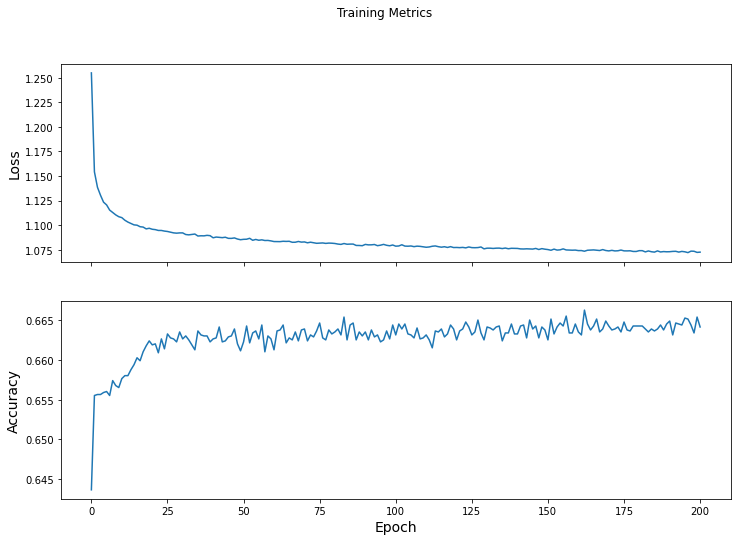

In [73]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

Pregatim setul de date de test

In [74]:
test_dataset = tf.data.experimental.make_csv_dataset(
    'Testing.csv',
    batch_size=64,
    column_names=column_names,
    column_defaults = ['int32', 'int32', 'int32', 'int32', 'int32', 'int32', 'int32', 'int32','int32'],
    label_name='Package',
    num_epochs=1,
    shuffle=False)

test_dataset

<PrefetchDataset shapes: (OrderedDict([(Gender, (None,)), (Married, (None,)), (Graduated, (None,)), (Work_Experience, (None,)), (Spending_Score, (None,)), (Family_Size, (None,)), (Age_Bin, (None,)), (Profession_cat, (None,))]), (None,)), types: (OrderedDict([(Gender, tf.int32), (Married, tf.int32), (Graduated, tf.int32), (Work_Experience, tf.int32), (Spending_Score, tf.int32), (Family_Size, tf.int32), (Age_Bin, tf.int32), (Profession_cat, tf.int32)]), tf.int32)>

In [75]:
test_dataset = test_dataset.map(pack_features_vector)

Evaluam modelul

In [76]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
    logits = model(x, training=False)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

print("Accuracy test: {:.3%}".format(test_accuracy.result()))

Accuracy test: 65.742%


In [77]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(35, 2), dtype=int32, numpy=
array([[6, 6],
       [6, 6],
       [6, 6],
       [6, 6],
       [6, 6],
       [6, 6],
       [6, 6],
       [6, 6],
       [6, 6],
       [6, 6],
       [6, 6],
       [6, 6],
       [6, 6],
       [6, 6],
       [6, 6],
       [6, 6],
       [6, 6],
       [1, 6],
       [2, 2],
       [6, 6],
       [6, 6],
       [6, 6],
       [6, 6],
       [6, 6],
       [2, 6],
       [2, 6],
       [6, 6],
       [6, 6],
       [4, 6],
       [6, 6],
       [6, 6],
       [6, 6],
       [6, 6],
       [4, 6],
       [7, 6]])>

Desi modelul nu este unul ideal, el ne ajuta sa prezicem alegerile facute de 2/3 clienti. Astfel, caracteristicile sociale ale acestora ar putea ajuta la alegerea pechetelor de vacanta ce merita sa fie introduse pe noua piata, sau nu, cu o probabilitate de aproximativ 65%.